In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel
from matplotlib import collections  as mc

%matplotlib inline

## Unpaired t-test (Independent samples t-test)

We are going to compare two samples (A and B) and test if they have statistically equal mean by the given level of significance $\alpha$=0.05

$H_0 : \mu_0 = \mu_1$ <br/>
$H_1 : \mu_0 \neq \mu_1$

We will make the next assumptions:
- Samples are indendent
- Samples are normally distributed
- Samples have equal variance <br/>
$A \approx N(\mu_0, \sigma)$ <br/>
$B \approx N(\mu_1, \sigma)$

Also $\sigma$ is unknown. Use z-test otherwise

In [164]:
alpha = 0.05
A = np.array([1,2,2,3,3,4,4,5,5,6])
B = np.array([1,2,4,5,5,5,6,6,7,9])

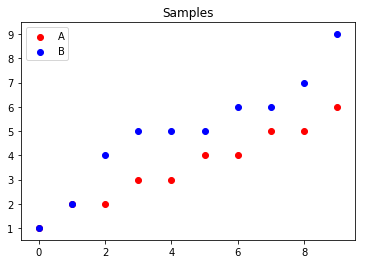

In [43]:
x = np.arange(0, len(A))
plt.scatter(x, A, color='red')
plt.scatter(x, B, color='blue');
plt.legend(['A', 'B'])
plt.title('Samples');

We execute the test and compute the t-value and its corresponding p-value using the scipy.stats module. Its a double tailed test; It calculates the p-value as $2 * P(T > |t|)$

In [109]:
result = ttest_ind(A, B, equal_var=True)
t, p = result.statistic, result.pvalue

print('t-value is: {}'.format(round(t, 4)))
print('p-value is: {}'.format(round(p, 4)))

t-value is: -3.5157
p-value is: 0.0005


Our null hypothesis $H_0$ will be accepted if the t-value falls inside the confident interval. <br/>
Its the same as checking if p > $\alpha$ <br/>
If it's not the case, we reject the null hypothesis

In [26]:
if p > alpha:
    print('Null hypothesis accepted. Samples are statistically independent with a ' +
          '{}% confident interval'.format((1 - alpha)*100))
else:
    print('Null hypothesis rejected. Samples are statistically dependent with a ' +
          '{}% confident interval'.format((1 - alpha)*100))

Null hypothesis accepted. Samples are statistically independent with a 95.0% confident interval


## One sample t-test

Now we are interested in comparing statistically the known mean of our population with our sample mean 

Again we will make the assumption that our sample X is distributed normally <br/>
$X \approx N(\mu_x, \sigma_x)$

In [100]:
X = np.random.randn(200) * 2 + 3
mu, mux = 2.45, X.mean()

alpha = 0.05

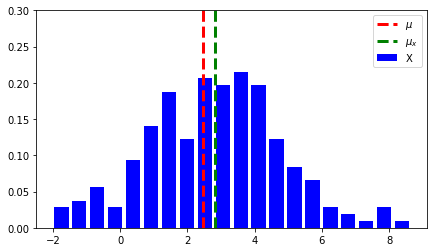

In [101]:
plt.figure(figsize=(7, 4))
plt.hist(X, bins=20, color='blue', rwidth=0.8, density=True);
plt.vlines([mu], ymin=0, ymax=0.5, linestyles='--', linewidth=3, color='red')
plt.vlines([mux], ymin=0, ymax=0.5, linestyles='--', linewidth=3, color='green')
plt.ylim([0, 0.3])
plt.legend(['$\mu$', '$\mu_x$', 'X']);

We know our population mean $\mu$ but variance $\sigma$ is unknown

$H_0 : \mu_x = \mu$ <br/>
$H_1 : \mu_x \neq \mu$

Compute t-value and p-value using ttest_1samp function from scipy.stats module. Its again a double tailed test; p-value is $2 * P(T > |t|)$

In [102]:
result = ttest_1samp(X, mu)
t, p = result.statistic, result.pvalue

In [110]:
print('t-value is: {}'.format(round(t, 4)))
print('p-value is: {}'.format(round(p, 4)))

t-value is: -3.5157
p-value is: 0.0005


Compare p-value with significance level <br/>
Accept null hypothesis if p > $\alpha$

In [111]:
if p > alpha:
    print('Null hypothesis accepted. Population mean is statistically equal ' +
          'to the sample mean with a {}% confident interval'.format((1 - alpha)*100))
else:
    print('Null hypothesis rejected. Population mean is statistically different ' +
          'to the sample mean with a {}% confident interval'.format((1 - alpha)*100))

Null hypothesis rejected. Population mean is statistically different to the sample mean with a 95.0% confident interval


## Paired t-test (dependent samples t-test)

The last test is the dependent samples t-test, where the null hypothesis is that the mean of the differences of two samples A, B are 0. <br/>
A, B samples are usually set of observations of the same kind or entity at different time steps or moments (each set has an obervation on each time step)

$H_0 : \sum_{i=1}^{N} |A_i - B_i| = 0$ <br/>
$H_1 : \sum_{i=1}^{N} |A_i - B_i| \neq 0$ <br/>
where N is the sample size

We will make the assumption that the sample differences are normally distributed.
$X = \{|A_i - B_i| \forall i, 1<=i<=N \}$ <br/>
$X \approx N(\mu_x, \sigma_x)$ <br/>
Also the obvservations on each sample must be independent to each other

We are going to compare the results of the califications of 20 students before and after cursing a subject

In [205]:
before = [18, 21, 16, 22, 19, 24, 17, 21, 23, 18, 14, 16, 16, 19, 18, 20, 12, 22, 15, 17]
after = [22, 25, 17, 24, 16, 29, 20, 23, 19, 20, 15, 15, 18, 26, 18, 24, 18, 25, 19, 16]
before, after = np.array(before), np.array(after)
differences = np.abs(before - after)
n = len(before)
x = np.arange(0, n)

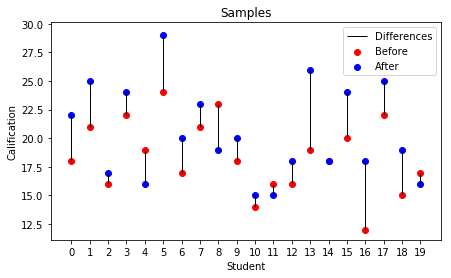

In [203]:
plt.figure(figsize=(7, 4))

lines = mc.LineCollection(
    list(zip(np.stack([x, before], axis=1), np.stack([x, after], axis=1))),
    linewidths=1, colors='black')
plt.gca().add_collection(lines)

plt.scatter(x, before, color='red')
plt.scatter(x, after, color='blue')

plt.title('Samples')
plt.legend(['Differences', 'Before', 'After'])
plt.xticks(x);
plt.xlabel('Student')
plt.ylabel('Calification');

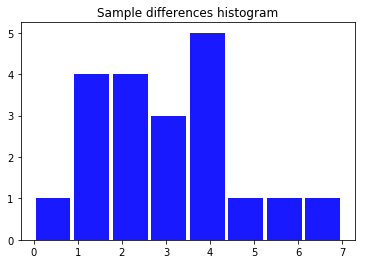

In [216]:
plt.hist(differences, bins=8, rwidth=0.9, color='blue', alpha=0.9);
plt.title('Sample differences histogram');

We can use ttest_rel on scipy.stats compute the t-value and p-value

In [219]:
result = ttest_rel(before, after)
t, p = result.statistic, result.pvalue
print('t-value is: {}'.format(round(t, 4)))
print('p-value is: {}'.format(round(p, 4)))

t-value is: -3.2313
p-value is: 0.0044


Now compare p-value with $\alpha$ <br/>
Accept null hypotesis if p-value > $\alpha$

In [223]:
alpha = 0.05
if p > alpha:
    print('Null hypothesis accepted:' + 
          'The students califications are statistically equal before and after the course ' +
          'with a {}% confident interval'.format( (1 - alpha) * 100 ))
else:
    print('Null hypothesis rejected:' + 
          'The students califications have statistically been improved after the course ' +
          'with a {}% confident interval'.format( (1 - alpha) * 100 ))

Null hypothesis rejected:The students califications have statistically been improved after the course with a 95.0% confident interval
